In [5]:
# The project aims to build a machine learning-based predictive model to forecast stock market trends using real-world market data. 
# Leveraging market data integration and deep learning techniques, this project addresses the need for accurate and reliable stock price 
# predictions to aid in financial decision-making. The goal is to create a robust and scalable predictive model that can analyze real-time 
# data, identify trends, and predict future stock prices effectively.

# high level Approach 

# Step - 1 Installing Python dependencies
# Step - 2 Data preparation: acquiring data from yF Vantage stock APIs
# Step - 3 Data preparation: normalizing raw data
# Step - 4 preparation: generating training and validation datasets
# Step - 5 Defining the LSTM model
# Step - 6 Model training
# Step - 7 Model evaluation
# Step - 8 Predicting future stock prices

In [2]:
# Installing Python dependencies 
import numpy as np # For numerical computations
import pandas as pd # For data manipulation and analysis
import yfinance as yF # For getting real time financial market data from Yahoo Finance APIs
import datetime as dt # For handling date and time objects
import matplotlib.pyplot as plot # For creating visualizations
import matplotlib as plt
import matplotlib as plt
from pandas.plotting import scatter_matrix as sm # For creating a scatter plot matrix to analyze correlations

In [3]:
# Data preparation: Acquiring data from yahoo Finance stock APIs
#This section prepares to fetch stock market data from Yahoo Finance API by defining the start
# and end dates for the data acquisition process.

# Define the end date for data collection as today's date
end_date = dt.datetime.now() # Get the current date and time as the end date
print(end_date)

# Define the start date for data collection (custom historical date)
start_date = dt.datetime(2010,3,30) # Set a custom start date for data collection
print(start_date)

2024-12-07 20:01:33.630641
2010-03-30 00:00:00


In [4]:
# Single Stocks Ticker - Apple Inc
stock ='AAPL'
# Use Yahoo Finance Library to download stock price data directly into a Pandas DataFrame structure
# Download historical stock data for the given ticker symbol (AAPL) and date range
df_stock = yF.download(stock,start_date,end_date)
# Print Data Frame first 5 rows looks like table or excel column and rows
df_stock.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-30,8.450000,8.481429,8.366071,8.423214,7.105378,527310000
2010-03-31,8.410357,8.450357,8.373571,8.392857,7.079772,430659600
2010-04-01,8.478929,8.526071,8.312500,8.427500,7.108994,603145200
2010-04-05,8.392143,8.518214,8.384643,8.517500,7.184913,684507600
2010-04-06,8.507143,8.580000,8.464286,8.555000,7.216545,447017200


In [5]:
# Add Index given we have Date as Index 
df_stock = df_stock.reset_index()
df_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-03-30,8.450000,8.481429,8.366071,8.423214,7.105378,527310000
1,2010-03-31,8.410357,8.450357,8.373571,8.392857,7.079772,430659600
2,2010-04-01,8.478929,8.526071,8.312500,8.427500,7.108994,603145200
3,2010-04-05,8.392143,8.518214,8.384643,8.517500,7.184913,684507600
4,2010-04-06,8.507143,8.580000,8.464286,8.555000,7.216545,447017200


In [6]:
# Drop Date Column from Data Frame 
df_stock = df_stock.drop(columns = ['Date'],axis = 1)
df_stock.head()

,Open,High,Low,Close,Adj Close,Volume
0,8.450000,8.481429,8.366071,8.423214,7.105378,527310000
1,8.410357,8.450357,8.373571,8.392857,7.079772,430659600
2,8.478929,8.526071,8.312500,8.427500,7.108994,603145200
3,8.392143,8.518214,8.384643,8.517500,7.184913,684507600
4,8.507143,8.580000,8.464286,8.555000,7.216545,447017200


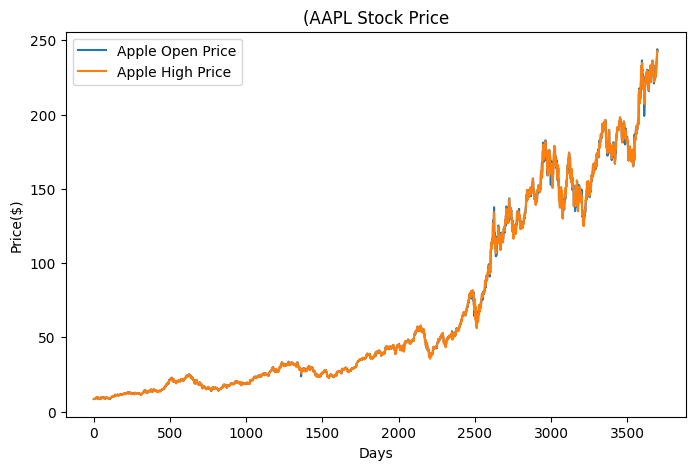

In [16]:
#Plot closing price, open price Remmber pandas is integrated with matplot
# Plot the 'Open' price data
df_stock['Open'].plot(label ='Apple Open Price',figsize=(8,5))
# Plot the 'Close' price data
df_stock['Close'].plot(label ='Apple High Price')
plot.title('(AAPL Stock Price') # Add a title to the chart
# Display the legend for the two plotted lines
plot.legend() 
plot.xlabel('Days') 
plot.ylabel('Price($)')                 
# Display the plot
plot.show()

In [18]:
# Add Moving Average of stock 
df_stock['MA100']= df_stock.Close.rolling(100).mean()
df_stock.head()

,Open,High,Low,Close,Adj Close,Volume,MA100
0,8.450000,8.481429,8.366071,8.423214,7.105378,527310000,NaN
1,8.410357,8.450357,8.373571,8.392857,7.079772,430659600,NaN
2,8.478929,8.526071,8.312500,8.427500,7.108994,603145200,NaN
3,8.392143,8.518214,8.384643,8.517500,7.184913,684507600,NaN
4,8.507143,8.580000,8.464286,8.555000,7.216545,447017200,NaN


In [19]:
# Creating one dimenional array 
MA200 = df_stock['MA200']= df_stock.Close.rolling(200).mean()
MA200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3694    206.10510
3695    206.40680
3696    206.71405
3697    207.01765
3698    207.31000
Name: Close, Length: 3699, dtype: float64

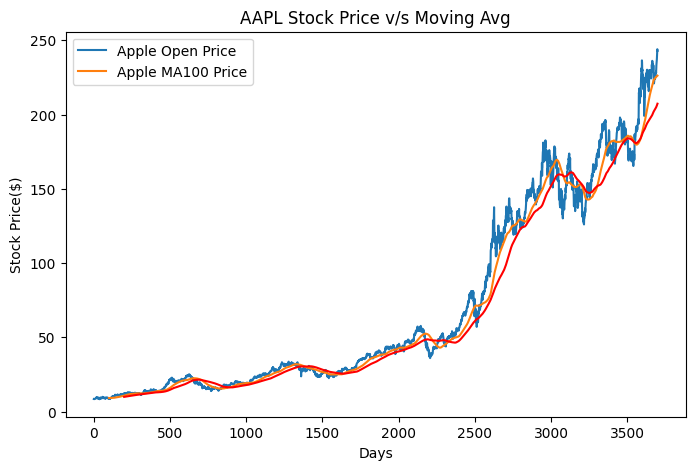

In [21]:
#plot closing price, moveing average 100 and 200 
# Plot the 'Open' price data
df_stock['Open'].plot(label ='Apple Open Price',figsize=(8,5))
# Plot the 'Moving Average 100' price data
df_stock['MA100'].plot(label ='Apple MA100 Price')
plot.plot(MA200,'r')
plot.title('AAPL Stock Price v/s Moving Avg')
plot.ylabel("Stock Price($)")
plot.legend()    
plot.xlabel('Days')                 
plot.show()

In [22]:
# total df_stock size
df_stock.shape

(3699, 8)

In [23]:
# We need to work with one column for our project which is called feature input 
stock_close = df_stock['Close']
# Create Data Frame for Close price for Stock  
df_stock_close = pd.DataFrame(df_stock.Close)
df_stock_close.head()

,Close
0,8.423214
1,8.392857
2,8.427500
3,8.517500
4,8.555000


In [24]:
df_stock_close.shape

(3699, 1)

In [25]:
# Data preparation: generating training and testing datasets for supervised learning

# Supervised machine learning methods, such as LSTM, learn the relationship (mapping function)
# between input variables (X) and output variable (Y). 
# In this project, we train the model to predict the 101st day's close price 
# based on the past 100 days of stock prices.


# Define training data: First 80% of the 'Close' price data
data_training  = df_stock_close.iloc[0:int((len(df_stock_close))*0.80)]

# Define testing data: Remaining 20% of the 'Close' price data
data_testing  = df_stock_close.iloc[int((len(df_stock_close))*0.80):int(len(df_stock_close))]

# Print the shapes of the datasets to verify correct split
print(data_training.shape)
print(data_testing.shape)

(2959, 1)
(740, 1)


In [26]:
data_training.head()

,Close
0,8.423214
1,8.392857
2,8.427500
3,8.517500
4,8.555000


In [27]:
# Data preparation: normalizing raw data for LSTM model
# For LSTM models, data must be scaled down to a range between 0 and 1. 
# Raw data in its original scale cannot be used directly.
# We'll import the MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# Define a scaler object with a feature range between 0 and 1.
# Here, the 'Close' price (our feature) will be scaled using this scaler object.
scaler = MinMaxScaler(feature_range = (0,1))

# Why normalization is necessary:
# - Machine learning models using gradient descent optimization require normalized data 
#   because varying scales of input features affect step size and convergence.
# - Normalization ensures the LSTM model learns efficiently and is not biased 
#   by large differences in input feature magnitudes.

# Benefits of normalization:
# - Improves model accuracy by preventing specific features from dominating the learning process.
# - Helps the gradient descent algorithm converge faster by maintaining a consistent input scale.
# - For LSTMs, which are sensitive to input scales, normalization ensures accurate pattern recognition.

# Example:
# Stock prices, such as IBM's range ($40 to $160), are normalized to a standard range [0, 1] 
# before being fed into the model. After prediction, they can be scaled back to the original scale.
                      

In [28]:
# Fit the training data using MinMaxScaler and scale it to the range [0, 1].
# This step computes the min and max values from the training data and applies the scaling transformation.
# The scaled data is returned as a NumPy array.
data_training_array = scaler.fit_transform(data_training)

# Why scaling and array conversion are necessary:
# - The LSTM model requires input data in numerical array format (not DataFrames or Series).
# - Scaling ensures all values are normalized to the same range, improving the model's ability 
#   to learn effectively and preventing bias toward larger numerical values.
# - The scaling parameters (min and max) are derived only from the training data to avoid data leakage.

In [29]:
# converted data frame data_training_array 
data_training_array

array([[1.76560805e-04],
       [0.00000000e+00],
       [2.01487428e-04],
       ...,
       [9.76444863e-01],
       [1.00000000e+00],
       [9.93951228e-01]])

In [33]:
# LSTMs are supervised learning models, so they need input sequences (x_train) and target outputs (y_train).
# We'll use a sliding window approach where:
# - x_train contains values for a fixed number of past days (e.g., 10 days).
# - y_train contains the value for the next day (e.g., day 11).
# This process repeats, sliding the window one step at a time, until all sequences are prepared.

# Initialize empty lists to hold training data
x_train=[]
y_train=[]
for i in range (100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

In [34]:
# convert the data into numpy array these trains for LSTM model
x_train =np.array(x_train)
y_train =np.array(y_train)
y_train.shape

(2859,)

In [35]:
# ML Model: Importing necessary components for building the LSTM model
# Layers required for defining the LSTM architecture
from keras.layers import Dense,Dropout, LSTM 

# Sequential model to stack layers in a linear order
from keras.models import Sequential

In [38]:
# Defining the LSTM model
# Why LSTM?
# LSTM (Long Short-Term Memory) is a specialized artificial neural network architecture
# that excels in processing and predicting sequential data. It belongs to the class of
# Recurrent Neural Networks (RNNs) and overcomes the limitations of traditional RNNs,
# such as the vanishing gradient problem, by using memory cells and gates to retain 
# long-term dependencies in data.

# LSTM is ideal for stock price prediction as it can "memorize" patterns from historical sequences 
# and extrapolate these patterns to predict future values.

# Define the Sequential model
model=Sequential()

# Input layer: Adding the first LSTM layer
model.add(LSTM(units=50, activation ='relu', return_sequences = True, 
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

# units=50: Specifies the number of LSTM units (memory cells) in this layer.
# This is a commonly chosen value that balances model complexity and computational efficiency. 
# activation='relu': Applies the ReLU activation function to introduce non-linearity and help the model learn complex patterns.
# return_sequences=True: Ensures that the output of this layer is a sequence (required when stacking multiple LSTM layers).
# input_shape=(x_train.shape[1], 1): Specifies the shape of input data, where:
# x_train.shape[1] is the number of time steps. 1 indicates one feature (e.g., closing price).
#Dropout(0.2): Drops 20% of neurons randomly during training to prevent overfitting.

# Second LSTM layer
model.add(LSTM(units=60, activation ='relu', return_sequences = True))
model.add(Dropout(0.3))


# Third LSTM layer
model.add(LSTM(units=80, activation ='relu', return_sequences = True))
model.add(Dropout(0.4))


# Fourth LSTM layer
model.add(LSTM(units=120, activation ='relu'))
model.add(Dropout(0.5))

# Output Layer: Dense layer to predict the closing price
model.add(Dense(units = 1))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
# summary of ML Model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Compile the model 
# we use adam model different typr of losses, for time series analysis we keep error 
#The LSTM model learns by iteratively making predictions given the training data X. 
#We use mean squared error as the cost function, which measures the difference between the 
#predicted values and the actual values. When the model is making bad predictions, the error 
#value returned by the cost function will be relatively high. The model will fine-tune its 
#weights through backpropagation, improving its ability to make better predictions. 
#Learning stops when the algorithm achieves an acceptable level of performance, 
#where the error value returned by the cost function on the validation dataset is no 
#longer showing incremental improvements.

#We use the Adam optimizer that updates the model's parameters based on the learning rate 
#through its step() method. This is how the model learns and fine-tunes its predictions. 
#The learning rate controls how quickly the model converges. A learning rate that is too 
#high can cause the model to converge too quickly to a suboptimal solution, whereas smaller 
#learning rates require more training iterations and may result in prolonged duration for 
#the model to find the optimal solution. We also use the StepLR scheduler to reduce the
#learning rate during the training process. You may also try the ReduceLROnPlateau scheduler, 
#which reduces the learning rate when a cost function has stopped improving for
#a "patience" number of epochs. Choosing the proper learning rate for your project is
 #   both art and science, and is a heavily researched topic in the machine learning 
#community.

# Compile the model: Specify the optimizer and loss function for training

model.compile(optimizer='adam',loss = 'mean_squared_error')

# We used Adam Optimizer to combines the advantages of RMSProp and Momentum optimizers, dynamically adjusting 
#  learning rates for individual parameters.

#  Used Mean Squared Error (MSE) Loss Function? as it is a common loss function for regression problems, 
#  including time-series forecasting.
#  Also MSE helps improve the accuracy of predictions by minimizing the average squared differences 
#  between actual and predicted values.



In [41]:
# Inspect the first few rows of the training dataset to ensure it is properly formatted
data_training.head()

# Training the LSTM model
# - epochs=50: Train the model for 50 complete passes through the training dataset
# - batch_size=32: Process 32 samples at a time before updating the model weights
# - verbose=1: Display a progress bar and training metrics for each epoch

model.fit(x_train,y_train, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - loss: 0.0251
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 0.0041
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - loss: 0.0029
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - loss: 0.0030
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - loss: 0.0033
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - loss: 0.0022
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - loss: 0.0023
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 0.0025
Epoch 9/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - loss: 0.0023
Epoch 10/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - loss: 0.0025
Epoch 11/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 0.0018
Epoch 12/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - loss: 0.0021
Epoch 13/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - loss: 0.0019
Epoch 14/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 0.0024
Epoch 15/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 

In [45]:
data_testing.head()

,Close
2959,179.380005
2960,178.199997
2961,177.570007
2962,182.009995
2963,179.699997


In [46]:
#  Testing the model using to evaluate its accuracy
past_100_days = data_training.tail(100)

# Verify the extracted data
past_100_days 

,Close
2859,146.139999
2860,146.089996
2861,145.600006
2862,145.860001
2863,148.889999
...,...
2954,172.990005
2955,175.639999
2956,176.279999
2957,180.330002


In [47]:
# append to final test data
data_testing_final = pd.concat([past_100_days,data_testing])
data_testing_final

,Close
2859,146.139999
2860,146.089996
2861,145.600006
2862,145.860001
2863,148.889999
...,...
3694,239.589996
3695,242.649994
3696,243.009995
3697,243.039993


In [48]:
# Scale down data
data_testing_final_scale_array =scaler.fit_transform(data_testing_final)
data_testing_final_scale_array 
data_testing_final_scale_array.shape

(840, 1)

In [49]:
# Prepare x_test and y_test for model evaluation
x_test=[]
y_test=[]
for i in range (100,data_testing_final_scale_array.shape[0]):
    x_test.append(data_testing_final_scale_array[i-100:i])
    y_test.append(data_testing_final_scale_array[i,0])


In [50]:
# convert the data into numpy array 
x_test =np.array(x_test)
y_test =np.array(y_test)
y_train.shape
x_test

array([[[0.17895275],
        [0.17852907],
        [0.17437731],
        ...,
        [0.43433319],
        [0.46864944],
        [0.4598373 ]],

       [[0.17852907],
        [0.17437731],
        [0.17658028],
        ...,
        [0.46864944],
        [0.4598373 ],
        [0.46059998]],

       [[0.17437731],
        [0.17658028],
        [0.20225388],
        ...,
        [0.4598373 ],
        [0.46059998],
        [0.45060161]],

       ...,

       [[0.92679207],
        [0.9303509 ],
        [0.88002043],
        ...,
        [0.95161844],
        [0.97076769],
        [0.99669548]],

       [[0.9303509 ],
        [0.88002043],
        [0.84019657],
        ...,
        [0.97076769],
        [0.99669548],
        [0.99974582]],

       [[0.88002043],
        [0.84019657],
        [0.84129812],
        ...,
        [0.99669548],
        [0.99974582],
        [1.        ]]])

In [51]:
## Model evaluation
# Predict the stock prices for the test dataset (x_test)

y_predict = model.predict(x_test)

# Retrieve the scale factor used during normalization
# MinMaxScaler stores the scaling factor as `scaler.scale_`.
# We take the inverse to convert scaled values back to the original range.
scale =1/scaler.scale_

# Convert the actual test values (y_test) back to the original scale
y = y_test*scale
y_predict 

# Convert the predicted values (y_predict) back to the original scale
y_predict = y_predict*scale
y_predict 


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


array([[ 50.95834476],
       [ 51.33612066],
       [ 51.80652035],
       [ 52.32181096],
       [ 52.88873508],
       [ 53.48493345],
       [ 54.0136741 ],
       [ 54.3548528 ],
       [ 54.43515559],
       [ 54.24017573],
       [ 53.83119461],
       [ 53.30003057],
       [ 52.69544351],
       [ 52.059908  ],
       [ 51.39147897],
       [ 50.64684478],
       [ 49.77903579],
       [ 48.7543038 ],
       [ 47.56403853],
       [ 46.2147399 ],
       [ 44.74279407],
       [ 43.19278243],
       [ 41.70892711],
       [ 40.4790398 ],
       [ 39.66623388],
       [ 39.37924927],
       [ 39.62279208],
       [ 40.31758656],
       [ 41.33218529],
       [ 42.55207301],
       [ 43.88938478],
       [ 45.22071016],
       [ 46.39093403],
       [ 47.28951913],
       [ 47.91299041],
       [ 48.30277075],
       [ 48.47148364],
       [ 48.41633284],
       [ 48.11665441],
       [ 47.53726156],
       [ 46.6973621 ],
       [ 45.66914802],
       [ 44.5458586 ],
       [ 43

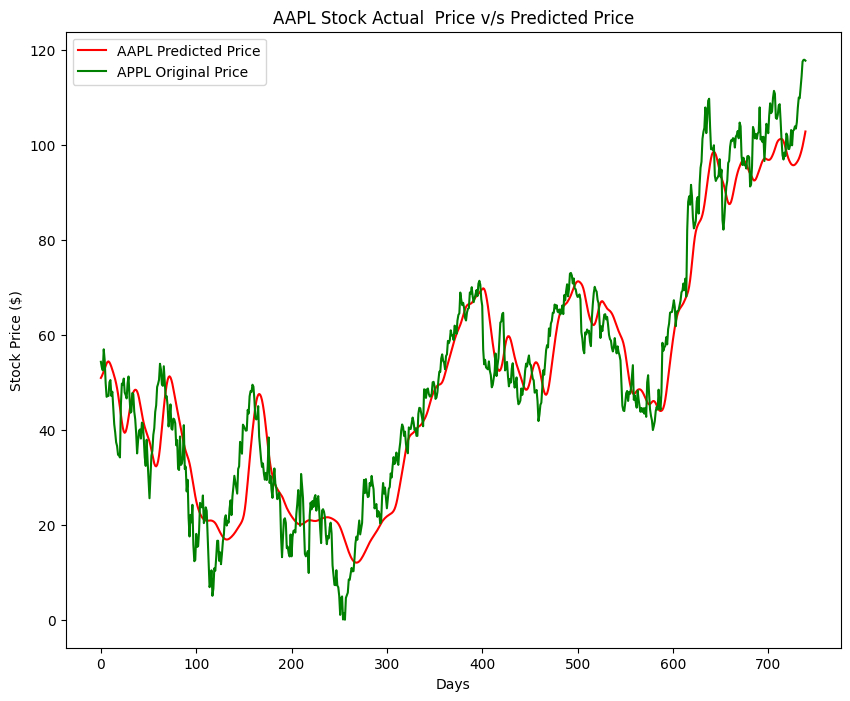

In [55]:
# Predicting future stock prices and visualizing results

# Initialize the Matplotlib figure with a specified size
plot.figure(figsize=(10,8))
plot.title('AAPL Stock Actual  Price v/s Predicted Price')
# Plot the predicted stock prices
plot.plot(y_predict, 'r', label = 'AAPL Predicted Price')

# Plot the actual stock prices
plot.plot(y, 'g', label = 'APPL Original Price')

# Add axis labels to provide context to the plot
plot.xlabel('Days')
plot.ylabel('Stock Price ($)')
plot.legend()
# Display the plot
plot.show()